In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from ultralytics_config import Config
from ultralytics_detect import plot_detection_comparison

In [2]:
nano_results_path = os.path.join(Config.RUNS_DIR, Config.DATASET, 'yolov8n.pt', Config.METRICS_FILE)
nano_results = pd.read_csv(nano_results_path, index_col=0)

small_results_path = os.path.join(Config.RUNS_DIR, Config.DATASET, 'yolov8s.pt', Config.METRICS_FILE)
small_results = pd.read_csv(small_results_path, index_col=0)

medium_results_path = os.path.join(Config.RUNS_DIR, Config.DATASET, 'yolov8m.pt', Config.METRICS_FILE)
medium_results = pd.read_csv(medium_results_path, index_col=0)


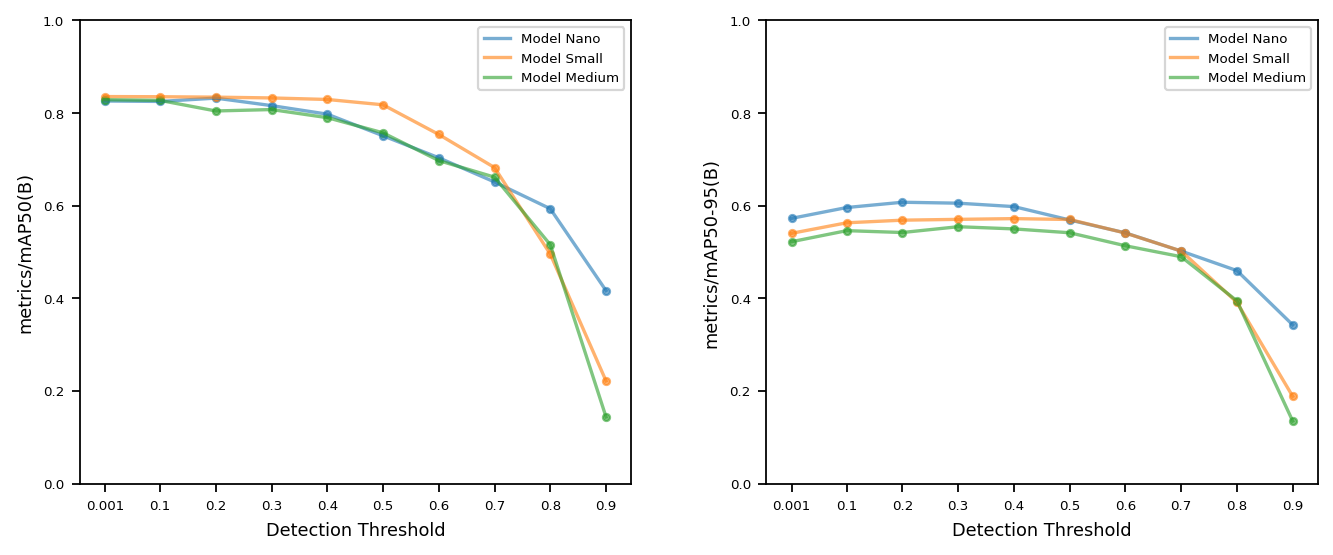

In [3]:

metrics = ['metrics/mAP50(B)', 'metrics/mAP50-95(B)']


fig, axes = plt.subplots(1, 2, figsize=(9,4), dpi=160)
fig.tight_layout(pad=3)
axes = axes.flat

for i, metric in enumerate(metrics):

    ax = axes[i]

    ax.plot(nano_results.index, nano_results[metric], alpha=0.6, label='Model Nano')
    ax.scatter(nano_results.index, nano_results[metric], alpha=0.6, s=10)
    ax.plot(small_results.index, small_results[metric], alpha=0.6, label='Model Small')
    ax.scatter(small_results.index, small_results[metric], alpha=0.6, s=10)
    ax.plot(medium_results.index, medium_results[metric], alpha=0.6, label='Model Medium')
    ax.scatter(medium_results.index, medium_results[metric], alpha=0.6, s=10)

    ax.legend(fontsize=6)

    y_ticks = np.round(np.arange(0,1.1,0.2), 1)
    x_ticks = Config.THRESHOLDS
    ax.set_yticks(y_ticks, labels=y_ticks, fontsize=6)
    ax.set_xticks(x_ticks, labels=x_ticks, fontsize=6)

    ax.set_xlabel("Detection Threshold", fontsize=8)
    ax.set_ylabel(metric, fontsize=8)


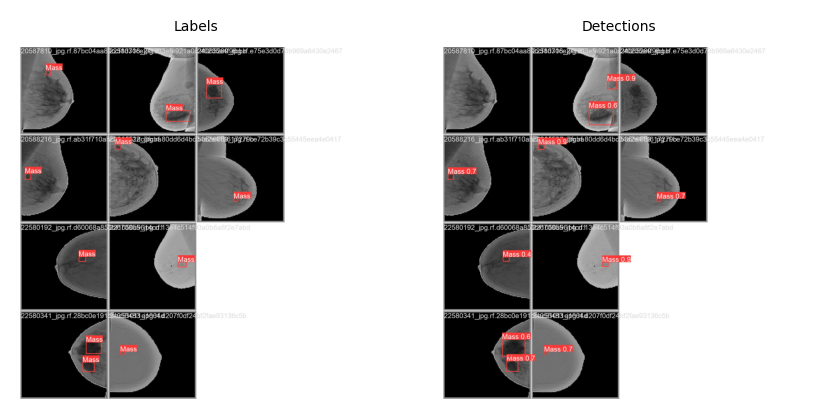

In [5]:
model_size = 'yolov8n.pt'
# validation_path = os.path.join(Config.RUNS_DIR, Config.DATASET, model_size, 'test', 'train')
validation_path = os.path.join(Config.RUNS_DIR, Config.DATASET, model_size, 'fold_1', 'train')
plot_detection_comparison(validation_path)